In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 26 10:11:29 2019

@author: ziyan
"""

import cv2
import os
import copy
import numpy as np
import math
import pandas as pd
import regulation
from tqdm import tqdm

root_path = './dm/'
subfile = [] 
for item in os.listdir(root_path):
    path = os.path.join(root_path,item)
    subfile.append(path)

pos1_path = []
for item in os.listdir(subfile[0]):
    path = os.path.join(subfile[0],item)
    pos1_path.append(path)
    
testpos1_path = []
for item in os.listdir(subfile[1]):
    path = os.path.join(subfile[1],item)
    testpos1_path.append(path)
    
neg1_path = []
for item in os.listdir(subfile[2]):
    path = os.path.join(subfile[2],item)
    neg1_path.append(path)
    
testneg1_path = []
for item in os.listdir(subfile[3]):
    path = os.path.join(subfile[3],item)
    testneg1_path.append(path)
    
def binary(img):
    if len(img.shape)!=2:
        img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)
#    img, th2 = cv2.threshol,(img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    img = cv2.fastNlMeansDenoising(img,None,10,7,11)
    return img
    
def stat(angle,weight): 
#    th=4
    st = np.zeros(18)
    for i in range(len(angle)):
#        if weight[i]-th>0:
#            w = weight[i]-th
#        else:
#            w = 0
        key = int(angle[i]//10)
        if key==18:
            key=0
        st[key]=st[key]+weight[i]
    return st

def houghtran(src):
    th=1.5
    angle = []
    weight = []
    draw = copy.deepcopy(src)
    bina = binary(src)
    img = cv2.Canny(bina,20,300,3)
    lines = cv2.HoughLinesP(img,1.0,np.pi/180,33,20,1)
    if isinstance(lines,np.ndarray):
        for x1, y1, x2, y2 in lines.reshape(-1,4):
            w =math.sqrt((x1-x2)**2+(y1-y2)**2)
            if w>=th:
                cv2.line(draw, (x1, y1), (x2, y2), (125, 0, 255), 1)
                agg = (math.atan2(y2-y1,x2-x1))/math.pi*180
                weight.append(w)
                angle.append(int(agg)+90)
#    cv2.imshow('bin',bina)
#    cv2.imshow('src',draw)
#    cv2.waitKey(0)
#        
    return angle,weight,draw

def get(img):
    angle,w,dr = houghtran(img)

    d = stat(angle,w)
    sumation = d.sum()
    d = d/sumation
    d = np.append(d,sumation).reshape(1,-1)
    
    return d,dr

def write_dic(path,names):
    item = path[0]
    img = cv2.imread(item)
    data = get(img)
    data = pd.DataFrame(data)
    data['name'] = item.split('/')[-1]
    for i in tqdm(range(1,len(path))):
        item = path[i]
        img = cv2.imread(item)
        da = get(img)
        da = pd.DataFrame(da)
        da['name'] = item.split('/')[-1]
        data = pd.concat([data,da],ignore_index=True)	
        
    data.to_csv('./{}.csv'.format(names),float_format='%.2f')


	
if __name__=='__main__':
    np.seterr(divide='ignore',invalid='ignore')
    testPath = neg1_path+pos1_path
    real = []
    predict = []
    for i in tqdm(range(len(testPath))):
        if "POS" in testPath[i]:
            real.append(1)
        if "NEG" in testPath[i]:
            real.append(0)
        data,draw = get(cv2.imread(testPath[i]))
        result = regulation.classfication(data)
        predict.append(result)
        
     

100%|██████████| 7901/7901 [00:46<00:00, 170.52it/s]


In [6]:
len(predict),sum(predict)

(7901, 3420)

In [7]:
len(real),sum(real)

(7901, 347)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(real,predict))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74      7554
           1       0.10      0.99      0.18       347

   micro avg       0.61      0.61      0.61      7901
   macro avg       0.55      0.79      0.46      7901
weighted avg       0.96      0.61      0.72      7901



In [5]:
for i in range(len(predict)):
    print(real[i],predict[i])

0 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 1


0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 0


0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1


In [2]:
testPath = pos1_path+testpos1_path

In [7]:
ll = []
for i in range(len(testPath)):
    data,draw = get(cv2.imread(testPath[i]))
#     print(d.shape)
    subsrcipt = np.argsort(data[:,:18])[:,-3:]
    max_num = []
    for item in subsrcipt:
        max_num.append(data[0][item])
        
    max_num = np.stack(max_num)
    
    mean = np.mean(max_num)
    evaluation_index = (abs(max_num-mean)/mean).sum()
    E = evaluation_index/len(max_num)
    ll.append(E)

In [8]:
min(ll),max(ll)

(0.02623560404775799, 3.698761590112236)

(array([ 2.,  2.,  1.,  0.,  3.,  3.,  5.,  5., 11.,  8.,  5.,  7., 10.,
         3.,  8., 10., 10.,  8., 13.,  7., 11.,  6., 10.,  4.,  5.,  4.,
        10., 11., 10.,  8.,  3., 14.,  4.,  4.,  4.,  4.,  5.,  2.,  6.,
         9.,  7.,  3.,  5.,  9.,  4.,  4.,  3.,  4.,  8.,  4.,  7.,  9.,
         1.,  5.,  0.,  3.,  3.,  4.,  5.,  3.,  3.,  1.,  2.,  2.,  3.,
         4.,  3.,  0.,  1.,  1.,  2.,  3.,  1.,  2.,  0.,  1.,  2.,  3.,
         2.,  3.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.0262356 , 0.06296086, 0.09968612, 0.13641138, 0.17313664,
        0.2098619 , 0.24658716, 0.28331242, 0.32003768, 0.35676294,
        0.3934882 , 0.43021346, 0.46693872, 0.50366398, 0.54038924,
        0.5771145 , 0.61383976, 0.65056502, 0.68729028, 0.72401554,
        0.7607408 , 0.79746606, 0.83419132, 0.87091658, 0.90764184,
        0.9443671 , 0.98109236, 1.01781762, 1.05454288, 1.09126814,
        1.1279934 , 1.1647

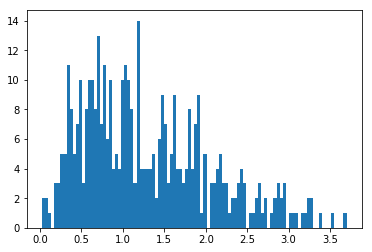

In [9]:
plt.hist(ll,100)